In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
# Data is avaliable from https://finance.yahoo.com/ and contains USD index
USD_index = pd.read_csv('USD.csv')
USD_index.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-31,110.669998,111.669998,110.669998,111.529999,111.529999,0.0
1,2022-11-01,111.519997,111.779999,110.720001,111.480003,111.480003,0.0
2,2022-11-02,111.540001,112.150002,110.430000,111.349998,111.349998,0.0
3,2022-11-03,112.169998,113.150002,111.820000,112.930000,112.930000,0.0
4,2022-11-04,112.970001,112.989998,110.720001,110.879997,110.879997,0.0


In [18]:
USD_index.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.0
mean,103.920500,104.283644,103.539016,103.908564,103.908564,0.0
std,2.201819,2.232131,2.095881,2.155595,2.155595,0.0
min,99.750000,100.019997,99.580002,99.769997,99.769997,0.0
25%,102.334999,102.650002,101.989998,102.300003,102.300003,0.0
50%,103.570000,103.959999,103.269997,103.570000,103.570000,0.0
75%,105.047503,105.360001,104.582496,105.082496,105.082496,0.0
max,112.970001,113.150002,111.820000,112.930000,112.930000,0.0


In [19]:
# Check if there are any missing values in the columns
missing_values = USD_index.isnull().sum()
missing_values

Date          0
Open         51
High         51
Low          51
Close        51
Adj Close    51
Volume       51
dtype: int64

In [20]:
# Filling in Missing Values
# Since we this is Time Series I will use Forward fill, ffil replaces the missing values with the value from the previous row
USD_index.fillna(method='ffill', inplace=True)
missing_values_after_fill=USD_index.isnull().sum()
missing_values_after_fill

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

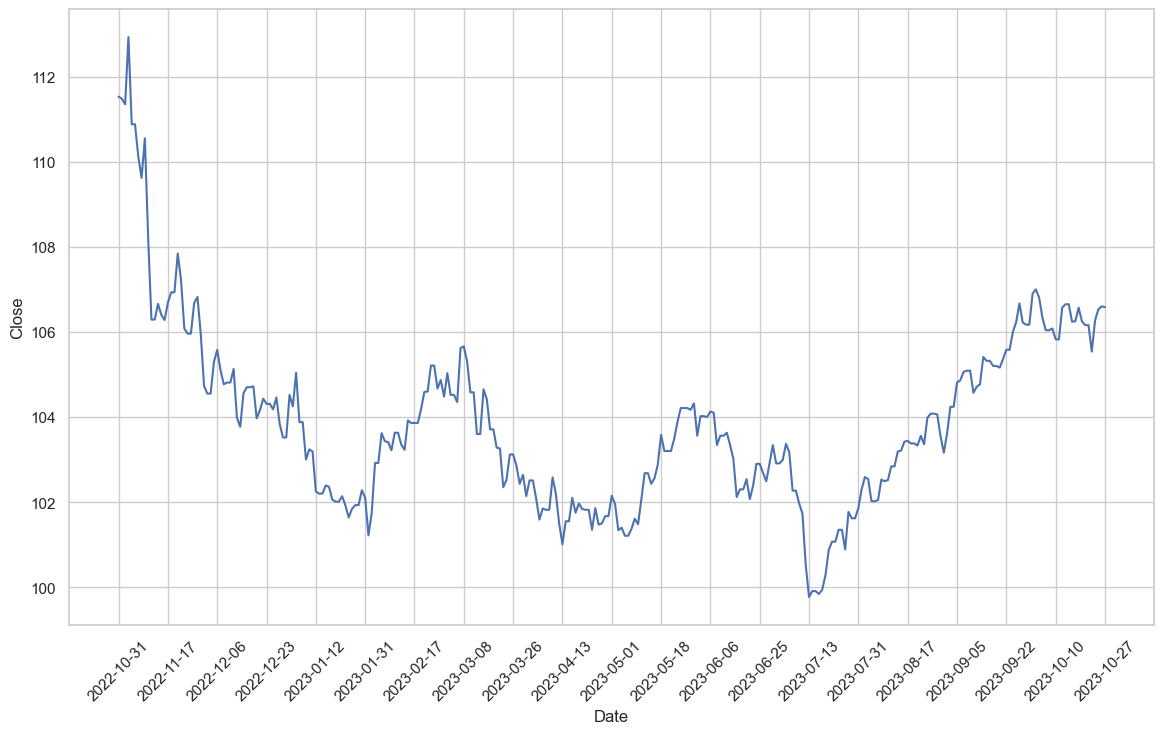

In [21]:
# Graph the Closing price over the time period, just to get some idea of how the data looks and is distrubuted
sns.set(style='whitegrid')
plt.figure(figsize=(14,8))
sns.lineplot(x=USD_index['Date'], y=USD_index['Close'] )
plt.xticks(USD_index['Date'][::15], rotation=45)
plt.show()

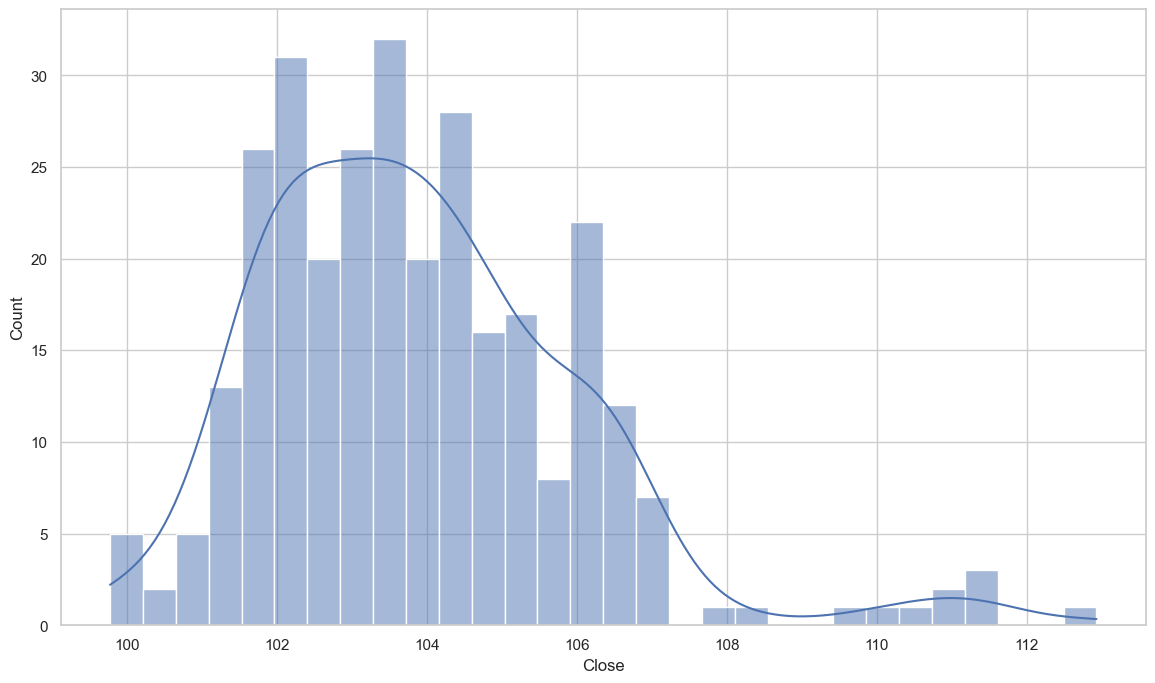

In [22]:
plt.figure(figsize=(14,8))
sns.histplot(x=USD_index['Close'], bins=30, kde=True)
plt.show()

In [23]:
# From the closing column we will create n=5 Lag featues 
for i in range(1,6):
    USD_index[f'lagged_{i}'] = USD_index['Close'].shift(i)
USD_index.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,lagged_1,lagged_2,lagged_3,lagged_4,lagged_5
0,2022-10-31,110.669998,111.669998,110.669998,111.529999,111.529999,0.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-01,111.519997,111.779999,110.720001,111.480003,111.480003,0.0,111.529999,NaN,NaN,NaN,NaN
2,2022-11-02,111.540001,112.150002,110.430000,111.349998,111.349998,0.0,111.480003,111.529999,NaN,NaN,NaN
3,2022-11-03,112.169998,113.150002,111.820000,112.930000,112.930000,0.0,111.349998,111.480003,111.529999,NaN,NaN
4,2022-11-04,112.970001,112.989998,110.720001,110.879997,110.879997,0.0,112.930000,111.349998,111.480003,111.529999,NaN
5,2022-11-06,112.970001,112.989998,110.720001,110.879997,110.879997,0.0,110.879997,112.930000,111.349998,111.480003,111.529999
6,2022-11-07,110.790001,111.269997,110.050003,110.120003,110.120003,0.0,110.879997,110.879997,112.930000,111.349998,111.480003
7,2022-11-08,110.059998,110.610001,109.370003,109.620003,109.620003,0.0,110.120003,110.879997,110.879997,112.930000,111.349998
8,2022-11-09,109.650002,110.639999,109.449997,110.550003,110.550003,0.0,109.620003,110.120003,110.879997,110.879997,112.930000
9,2022-11-10,110.300003,110.989998,107.709999,108.209999,108.209999,0.0,110.550003,109.620003,110.120003,110.879997,110.879997


In [24]:
# Remove the first rows where the lagged variables were NaN
USD_index.dropna(inplace=True)
USD_index.head()

,Date,Open,High,Low,Close,Adj Close,Volume,lagged_1,lagged_2,lagged_3,lagged_4,lagged_5
5,2022-11-06,112.970001,112.989998,110.720001,110.879997,110.879997,0.0,110.879997,112.930000,111.349998,111.480003,111.529999
6,2022-11-07,110.790001,111.269997,110.050003,110.120003,110.120003,0.0,110.879997,110.879997,112.930000,111.349998,111.480003
7,2022-11-08,110.059998,110.610001,109.370003,109.620003,109.620003,0.0,110.120003,110.879997,110.879997,112.930000,111.349998
8,2022-11-09,109.650002,110.639999,109.449997,110.550003,110.550003,0.0,109.620003,110.120003,110.879997,110.879997,112.930000
9,2022-11-10,110.300003,110.989998,107.709999,108.209999,108.209999,0.0,110.550003,109.620003,110.120003,110.879997,110.879997


In [25]:
# Define features (X) and target (y) using ALL available features. This will probably give a near perfect model.
X_all_features = USD_index.drop(['Date', 'Close'], axis=1)
y_all = USD_index['Close']
# Split the data into the test and training sets. 
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all_features, y_all, test_size=0.2, random_state=100)

In [26]:
# Normalise the features
scaler_all = StandardScaler()
X_train_all_scaler = scaler_all.fit_transform(X_train_all)
X_test_all_scaler = scaler_all.fit_transform(X_test_all)

In [27]:
# Define our fucntion and fit it with out training sets
lreg_all = LinearRegression()
lreg_all.fit(X_train_all_scaler, y_train_all)

LinearRegression()

In [28]:
# Let the model create our predictions
# calculate the Mean squared error which is the sqaured difference between the actual y values and out predicted values
predictions_all_features = lreg_all.predict(X_test_all_scaler)
mse_all_features = mean_squared_error(y_test_all, predictions_all_features)
mse_all_features

0.0025395451396951984

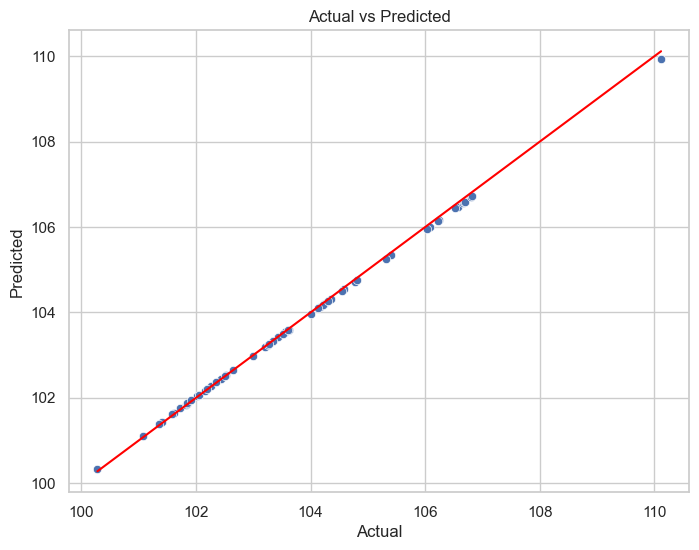

In [29]:
# The MSE is close to 0, meaning the model is almost a perfect fit, pretty unrealistic
# but expected if using all the varialbes such as open, high, low etc.
# We can plot our model on a scatter plot with the actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_all, y=predictions_all_features)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.plot([min(y_test_all), max(y_test_all)], [min(y_test_all), max(y_test_all)], color='red')  # Line of best fit
plt.show()

As expected with using all features the MSE is very low and the plot also shows it basically has a prefect fit.
I will recreate the model using only the lagged variables

In [30]:
# Define features (X) and target (y) using only the lagged columns for features
X_lagged = [f'lagged_{i}' for i in range(1,6)]
X_features = USD_index[X_lagged]
y_features = USD_index['Close']
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.2, random_state=100)

In [31]:
# Normalize the features
scaler_feat = StandardScaler()
X_train_scaler = scaler_feat.fit_transform(X_train)
X_test_scaler = scaler_feat.fit_transform(X_test)

In [32]:
# Define our fucntion and fit it with out training sets
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaler, y_train)

LinearRegression()

In [33]:
# Using our model, predict the values and calculate the MSE
y_predictions = lin_reg.predict(X_test_scaler)
mse_lagged_features = mean_squared_error(y_test, y_predictions)
mse_lagged_features

0.1880123094052628

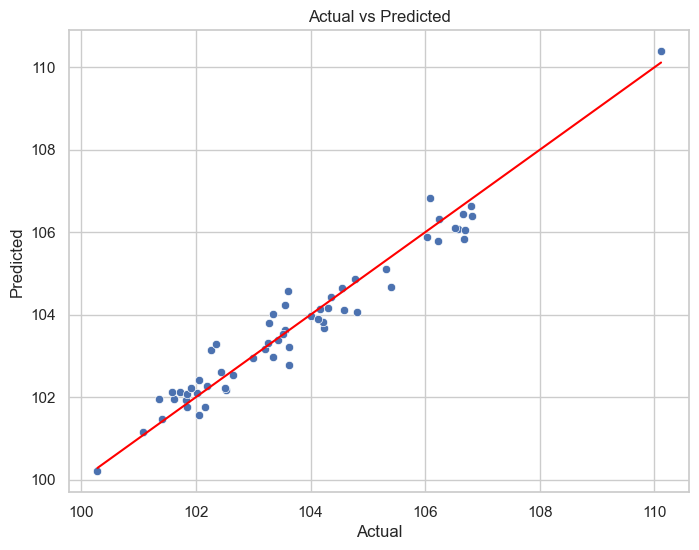

In [34]:
# Plot our model on a scatter plot to see how it differes from the actual data points
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_predictions)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of best fit
plt.show()